In [2]:
import numpy as np

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
fetch_housing_data()

In [10]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


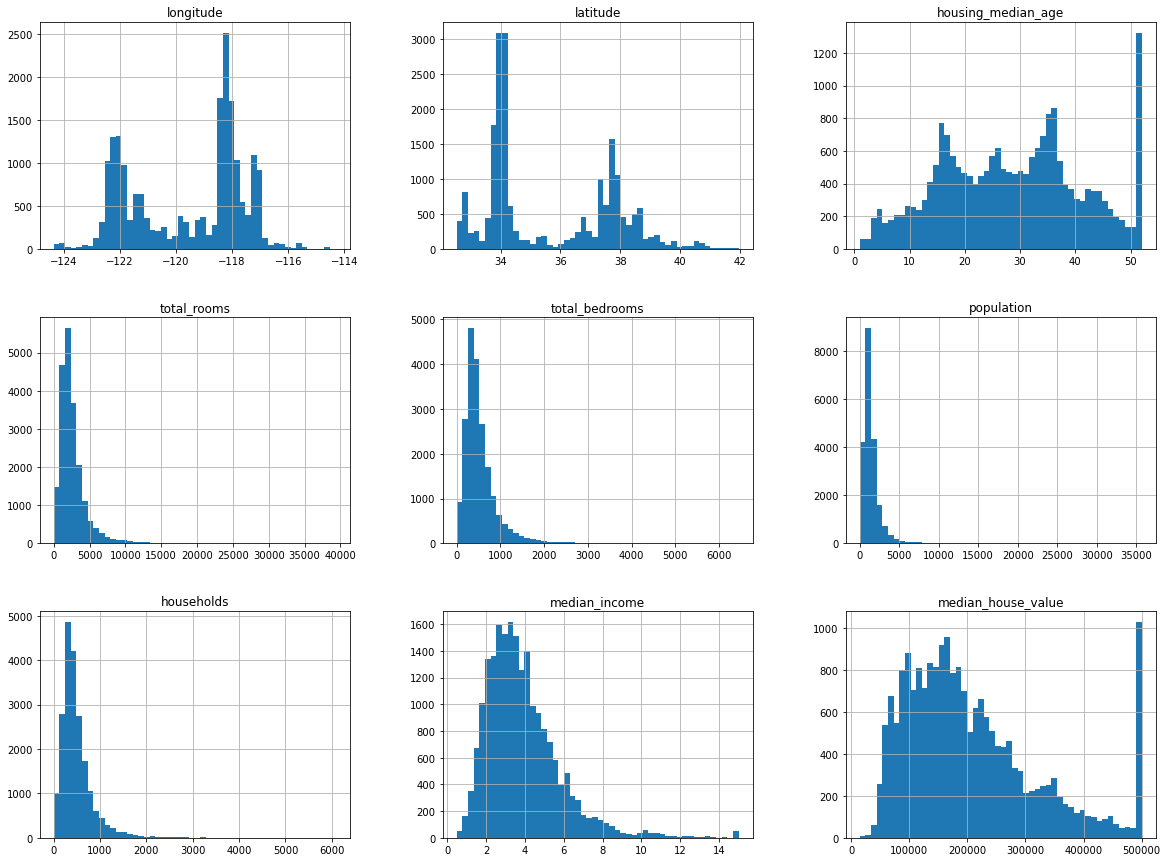

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [23]:
def train_test_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [24]:
train_set, test_set = train_test_split(housing, 0.2)

In [26]:
print(len(housing))
print(len(train_set))
print(len(test_set))

20640
16512
4128


In [27]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

<AxesSubplot:>

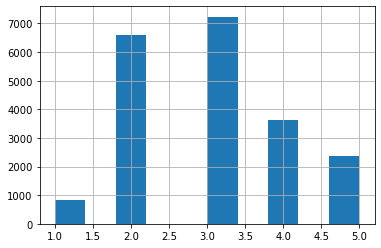

In [28]:
housing["income_cat"].hist()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [31]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [32]:
type(strat_test_set)

pandas.core.frame.DataFrame

In [35]:
strat_test_set.shape

(4128, 11)

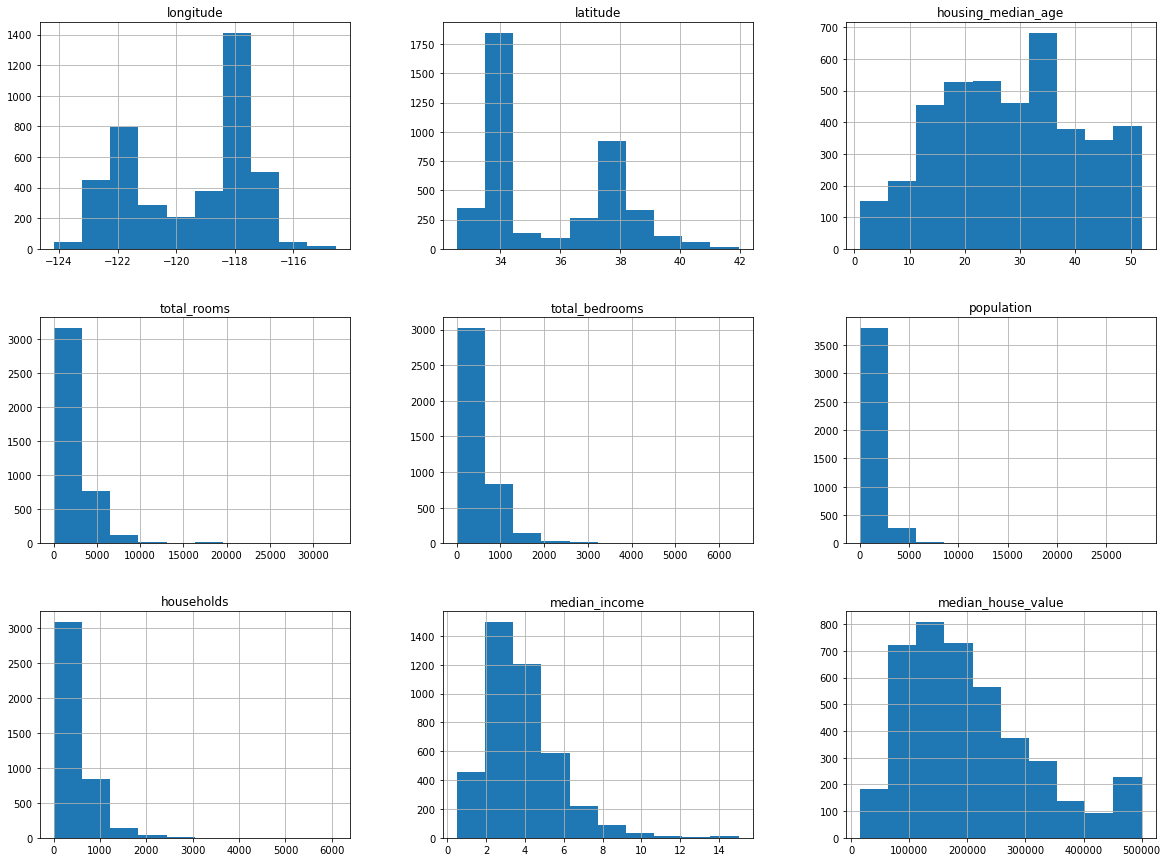

In [39]:
strat_test_set.hist(figsize=(20,15))
plt.show()

In [41]:
housing = strat_test_set.copy()

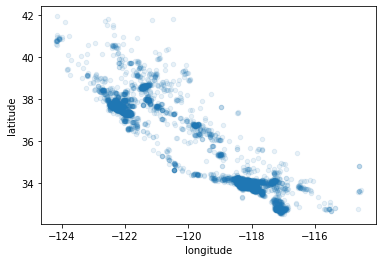

In [43]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.1);

<function matplotlib.pyplot.legend(*args, **kwargs)>

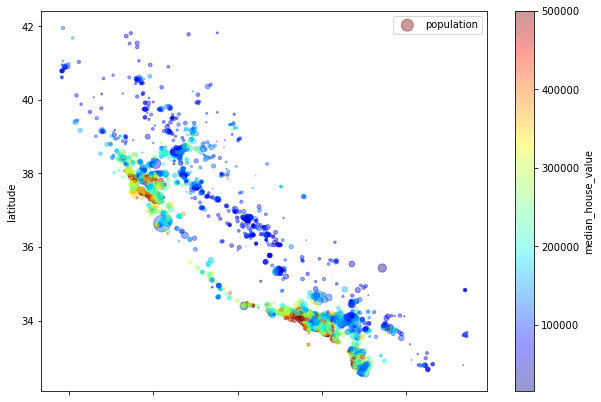

In [49]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.4, s=housing['population']/100, 
             label='population', figsize=(10,7), c = 'median_house_value', cmap=plt.get_cmap('jet'),
            colorbar=True);
plt.legend

In [50]:
corr_matrix=housing.corr()

In [54]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

In [55]:
from pandas.plotting import scatter_matrix

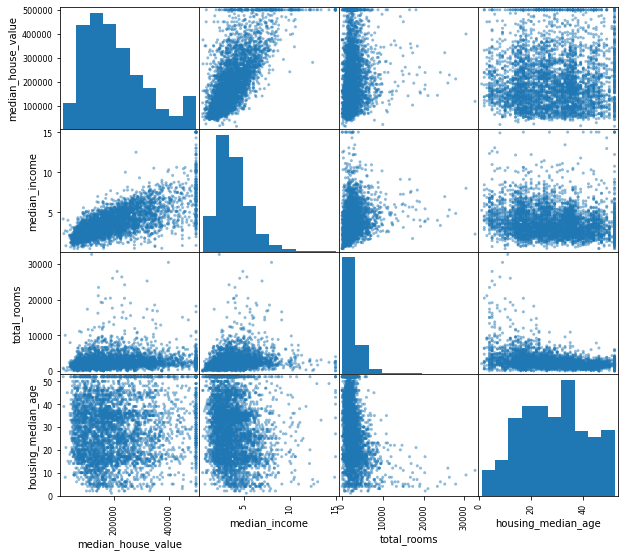

In [58]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(10,9));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

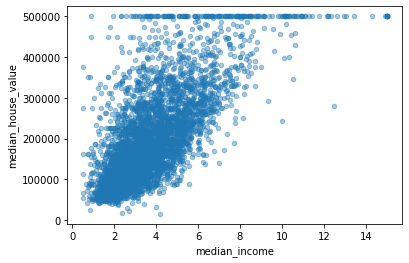

In [61]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.4)

In [63]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [64]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

In [65]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [68]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [69]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [70]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [72]:
housing_num.median().values

/var/folders/yg/069hjm3s3h93pz6xvwym8qxr0000gn/T/ipykernel_8398/3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [73]:
X = imputer.transform(housing_num)

In [75]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [78]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


In [79]:
housing_cat = housing[['ocean_proximity']]

In [81]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [83]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [84]:
OrdinalEncoder?

In [85]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [96]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [97]:
housing_prepared = full_pipeline.fit_transform(housing)

In [106]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [109]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [111]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)

In [113]:
lin_rmse

68376.51254853733

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [116]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [117]:
tree_rmse

0.0

In [130]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [131]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std Dev:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [71846.37722937 71131.1843963  67456.6329454  71675.05073539
 70052.35971956 77940.46857059 70500.20698483 73648.04610369
 68152.28989881 69865.41977683]
Mean: 71226.80363607805
Std Dev: 2809.9306193360057


In [137]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs=-1)

forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [51328.33903715 49384.64465988 46934.27343074 52227.36760458
 47681.5536911  52242.3385538  52847.13971573 50074.22181578
 47976.58935112 53895.27211121]
Mean: 50459.17399710884
Std Dev: 2284.22655246273


In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [142]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [145]:
RandomForestRegressor?

In [147]:
param_grid=[
    {'n_estimators':[50,100,200], 'max_features': [8,9,10]}
]


grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 200}

In [151]:
param_grid=[
    {'n_estimators':[200,400], 'max_features': [8]}
]


grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 400}

In [152]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49950.48922814206 {'max_features': 8, 'n_estimators': 200}
49757.66306623849 {'max_features': 8, 'n_estimators': 400}


In [155]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances

array([6.30547611e-02, 5.75598516e-02, 4.45762822e-02, 1.60548305e-02,
       1.57712768e-02, 1.55636817e-02, 1.53573586e-02, 3.04739632e-01,
       1.38829614e-01, 3.33236351e-02, 1.10267852e-01, 3.97934435e-02,
       7.02686435e-03, 1.31871558e-01, 1.04116749e-04, 2.39151857e-03,
       3.71372462e-03])

In [156]:
extra_attribs = ["rooms_per_household", 'pop_perhhold', 'bedrooms_per_room']

cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3047396316119888, 'median_income'),
 (0.13882961358198523, 'income_cat'),
 (0.13187155771700665, 'INLAND'),
 (0.11026785168028254, 'pop_perhhold'),
 (0.0630547611279388, 'longitude'),
 (0.05755985157108218, 'latitude'),
 (0.044576282242331546, 'housing_median_age'),
 (0.039793443505027365, 'bedrooms_per_room'),
 (0.0333236351172925, 'rooms_per_household'),
 (0.016054830466460716, 'total_rooms'),
 (0.01577127678325198, 'total_bedrooms'),
 (0.015563681749429549, 'population'),
 (0.015357358558927413, 'households'),
 (0.007026864345332422, '<1H OCEAN'),
 (0.0037137246228313163, 'NEAR OCEAN'),
 (0.002391518569858788, 'NEAR BAY'),
 (0.00010411674897231985, 'ISLAND')]

In [157]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

In [158]:
final_rmse

47551.97980643758

In [159]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45562.40374684, 49461.59047012])

# Chapter 3 - Classification

In [160]:
from sklearn.datasets import fetch_openml

In [163]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [193]:
X = mnist['data']
y = mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


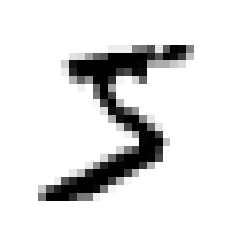

In [201]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

some_digit = X.to_numpy()[0]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [202]:
y[0]

'5'

In [204]:
y = y.astype(np.uint8)

In [206]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [207]:
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)

In [215]:
from sklearn.linear_model import SGDClassifier
import time

start = time.time()
sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train_5)
end = time.time()

print(end - start)

16.604431867599487


In [216]:
start = time.time()
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1)

sgd_clf.fit(X_train, y_train_5)
end = time.time()

print(end - start)

16.57936382293701


In [214]:
sgd_clf.predict([some_digit])

/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [246]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.to_numpy()[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.to_numpy()[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [247]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.to_numpy()[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.to_numpy()[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [248]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [257]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [265]:
from sklearn.metrics import confusion_matrix

B = confusion_matrix(y_train_5, y_train_pred)

B

array([[53892,   687],
       [ 1891,  3530]])

In [263]:
y_train_perfect_predictions = y_train_5

A = confusion_matrix(y_train_5, y_train_perfect_predictions)

A

array([[54579,     0],
       [    0,  5421]])

In [275]:
precision = B[1,1]/(B[0,1] + B[1,1])

recall = B[1,1]/(B[1,1] + B[1,0])

In [276]:
print(precision)
print(recall)

0.8370879772350012
0.6511713705958311


In [277]:
from sklearn.metrics import precision_score, recall_score

a = precision_score(y_train_5, y_train_pred)

b = recall_score(y_train_5, y_train_pred)

In [278]:
print(a)
print(b)

0.8370879772350012
0.6511713705958311


In [279]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [280]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [282]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [283]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method='decision_function')

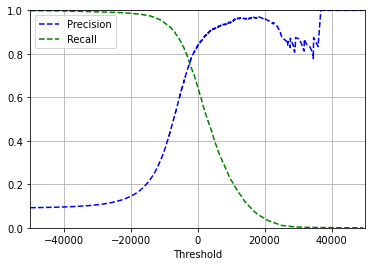

In [287]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.grid()
    plt.xlim(-50000, 50000)
    plt.ylim(0,1)
#     plt.axhline(y_value, c='r', ls = ':')
#     plt.axvline(x_value, c='r', ls=':')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


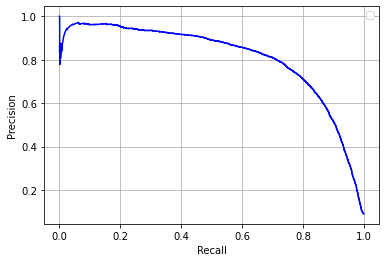

In [290]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], c='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.legend()
    
plot_precision_vs_recall(precisions, recalls)

Text(0, 0.5, 'y')

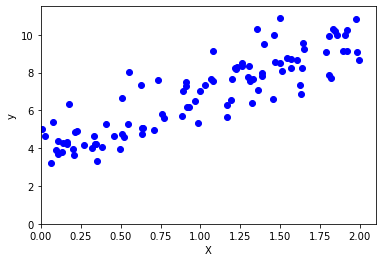

In [311]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.scatter(X,y, c ='b')
plt.ylim(0,11.5)
plt.xlim(0,2.1)
plt.xlabel('X')
plt.ylabel('y')

In [312]:
X_b = np.c_[np.ones((100,1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [313]:
theta_best

array([[3.80668657],
       [3.04897302]])

In [314]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.80668657],
       [9.90463261]])

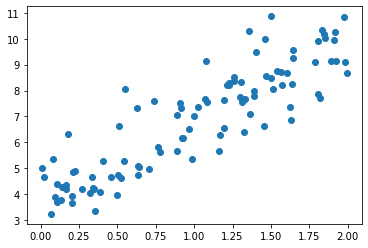

In [337]:
plt.scatter(X,y)

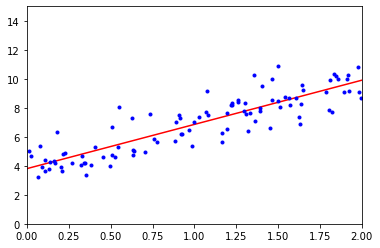

In [315]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.5236394]), array([[1.13329344]]))

In [319]:
lin_reg.predict(X_new)

array([[3.80668657],
       [9.90463261]])

In [320]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.80668657],
       [3.04897302]])

In [321]:
np.linalg.pinv(X_b).dot(y)

array([[3.80668657],
       [3.04897302]])

In [324]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [325]:
theta

array([[3.80668657],
       [3.04897302]])

ValueError: shapes (2,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

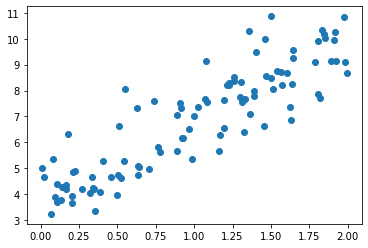

In [369]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + yi)

theta = np.random.rand(2,1)

plt.scatter(X,y)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        xi_old = X_b[random_index-2:random_index] #delete from here if this fucks up
        x_new_i = np.c_[xi_old.T, xi.T]
        y_pred = x_new_i.dot(theta)
        plt.plot(y_pred)

In [331]:
theta

array([[3.80454739],
       [3.06045894]])

In [339]:
gradients

array([[0.95831895],
       [0.10107521]])

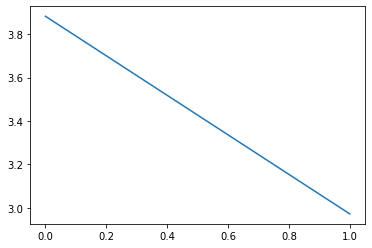

In [344]:
plt.plot(theta)

In [375]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1)

In [376]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81866807]), array([3.08849664]))

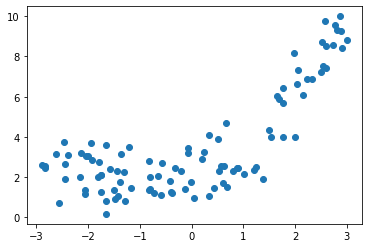

In [19]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.33123591])

In [21]:
X_poly[0]

array([0.33123591, 0.10971723])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.03589862]), array([[0.9799488 , 0.51063153]]))

In [23]:
y_hat = (lin_reg.coef_[0,0]*(x**2)) + (lin_reg.coef_[0,1]*x) + lin_reg.intercept_[0]

In [24]:
x = np.linspace(start=-3, stop=3, num=50)

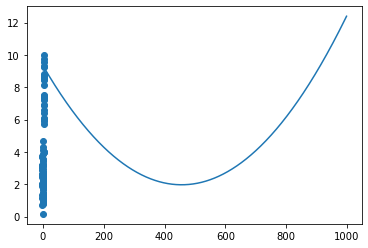

In [25]:
plt.scatter(X,y)
plt.plot(y_hat)

(-3.0, 3.0)

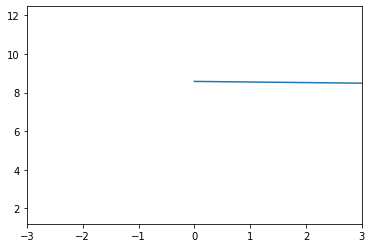

In [426]:
plt.plot(y_hat)
plt.xlim(-3,3)

In [448]:
lin_reg.coef_[0,0]

0.9418242226987295

In [407]:
lin_reg.coef_[0,1]

0.5632548179307333

In [445]:
y_hat[3]

6.838085103288416

In [446]:
lin_reg.intercept_[0]

1.793285775596041

In [464]:
y_hat2 = 0.942*x**2 + 0.563*x + 1.793

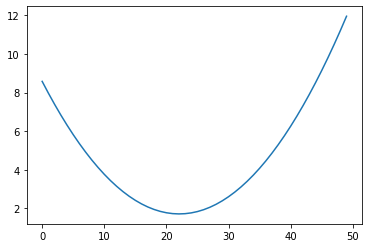

In [465]:
plt.plot(y_hat2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(-3,3,1000)

y_hat = lin_reg.coef_[0,1]*x**2 + lin_reg.coef_[0,0]*x + lin_reg.intercept_[0]

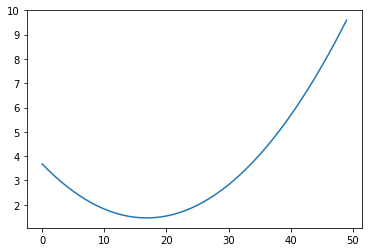

In [12]:
plt.plot(y_hat)

In [49]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    train_errors, test_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mse(y_train[:m], y_train_predict))
        test_errors.append(mse(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'Train')
    plt.plot(np.sqrt(test_errors), 'b-', linewidth=3, label = 'Test')
    plt.legend()

Text(0, 0.5, 'Training set size')

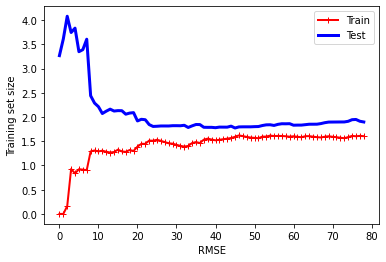

In [50]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()
plt.xlabel('RMSE')
plt.ylabel('Training set size')

(0.0, 3.0)

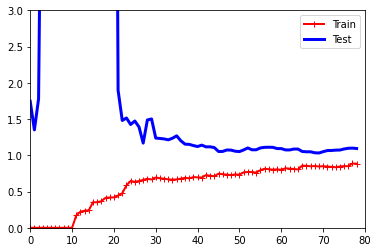

In [51]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.xlim(0,80)
plt.ylim(0,3)

In [40]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.23657487]])

In [42]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.22495398])

In [47]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha =0.1)
lasso_reg.fit(X,y)
print(lasso_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

from sklearn.preprocessing import StandardScaler

[5.19208479]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y.ravel(),test_size=0.2)

poly_scaler = Pipeline([
    ('polyfeatures', PolynomialFeatures(degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty = None, learning_rate = 'constant', eta0=0.0005)

minimum_value_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    test_error = mse(y_test, y_test_predict)
    if test_error < minimum_value_error:
        minimum_value_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [59]:
from sklearn.base import clone

In [1]:
import numpy as np
import sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [5]:
iris = load_iris()

X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)

In [6]:
per_clf = Perceptron()

per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([0])

In [10]:
iris?

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [63]:
tf.__version__

'2.11.0'

In [64]:
keras.__version__

'2.11.0'

In [65]:
fashion_mnist = keras.datasets.fashion_mnist

In [66]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [84]:
y_train.shape

(55000,)

In [70]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [71]:
class_names[y_train[0]]

'Coat'

In [72]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [75]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7285 - accuracy: 0.7615 - val_loss: 0.5056 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4858 - accuracy: 0.8319 - val_loss: 0.4712 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8443 - val_loss: 0.4535 - val_accuracy: 0.8450
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8543 - val_loss: 0.3927 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8599 - val_loss: 0.4005 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3815 - accuracy: 0.8661 - val_loss: 0.3978 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3678 - accuracy: 0.8702 - val_loss: 0.3760 - val_accuracy:

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

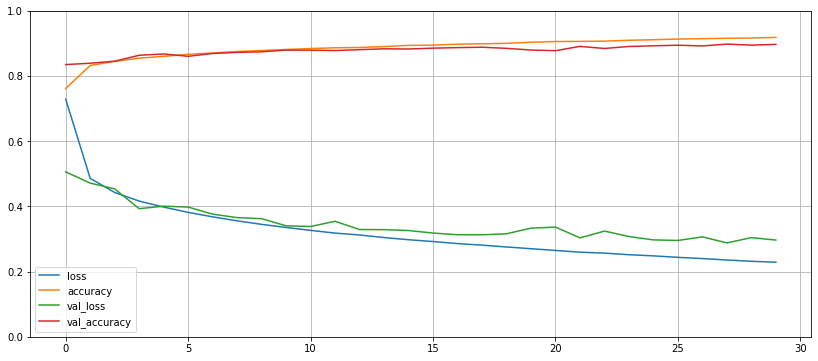

In [77]:
pd.DataFrame(history.history).plot(figsize = (14,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.1964 - accuracy: 0.8452


[69.19640350341797, 0.8452000021934509]

In [88]:
X_new = X_test[:3]

In [89]:
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [132]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [133]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

In [143]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])

In [144]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7761 - accuracy: 0.0028 - val_loss: 0.5039 - val_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6703 - accuracy: 0.0028 - val_loss: 2.3370 - val_accuracy: 0.0013
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3433 - accuracy: 0.0028 - val_loss: 10.5301 - val_accuracy: 0.0026
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.0028 - val_loss: 10.9319 - val_accuracy: 0.0023
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.0028 - val_loss: 11.4909 - val_accuracy: 0.0023
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.0028 - val_loss: 11.8171 - val_accuracy: 0.0023
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.0028 - val_loss: 11.6397 - val_accuracy: 0.0023
E

In [145]:
results = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.0035


In [109]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(15, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs=[output])

In [110]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4246 - val_loss: 0.5770
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5069 - val_loss: 0.5584
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4480 - val_loss: 0.6798
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4127 - val_loss: 0.8883
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3968 - val_loss: 1.0037
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3901 - val_loss: 1.3692
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3911 - val_loss: 1.1594
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3866 - val_loss: 1.5494
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3789 - val_loss: 1.7532
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3630 - val_loss: 1.8113

In [111]:
results = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3889


In [134]:
input_A = keras.layers.Input(shape = [5], name = 'Wide Input')
input_B = keras.layers.Input(shape = [6], name = 'Deep Input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = 'output')(concat)
model = keras.Model(inputs = [input_A, input_B], outputs=[output])

In [137]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics = ['accuracy'])

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [138]:
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, 
                    validation_data = ((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.0028 - val_loss: 0.4632 - val_accuracy: 0.0021
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.0028 - val_loss: 0.4632 - val_accuracy: 0.0021
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4607 - accuracy: 0.0028 - val_loss: 0.4757 - val_accuracy: 0.0021
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4603 - accuracy: 0.0028 - val_loss: 0.4777 - val_accuracy: 0.0021
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4567 - accuracy: 0.0028 - val_loss: 0.4883 - val_accuracy: 0.0021
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4550 - accuracy: 0.0028 - val_loss: 0.4956 - val_accuracy: 0.0021
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.0028 - val_loss: 0.5017 - val_accuracy: 0.0021
Epoch 

In [139]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.0035


In [140]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 60ms/step


In [141]:
y_pred

array([[2.9664624],
       [3.3645797],
       [1.6779735]], dtype=float32)

In [142]:
y_test[:3]

array([1.528, 3.3  , 2.221])

In [159]:
def build_model(n_hidden = 3, n_neurons = 30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

In [160]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/yg/069hjm3s3h93pz6xvwym8qxr0000gn/T/ipykernel_16988/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [151]:
keras_reg.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8455 - val_loss: 0.4579
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4978 - val_loss: 0.4066
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4314 - val_loss: 0.5178
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4277 - val_loss: 0.6673
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3960 - val_loss: 1.1517
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 1.2627
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 1.3359
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3530 - val_loss: 2.1062
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3445 - val_loss: 1.8555
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3376 - val_lo

In [152]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3695


In [153]:
y_pred = keras_reg.predict(X_new)

ValueError: in user code:

    File "/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 28, 28)


In [155]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [156]:
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [161]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)

In [162]:
rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7427 - val_loss: 0.7826
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7351 - val_loss: 0.6636
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6454 - val_loss: 0.6057
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6120 - val_loss: 0.5769
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5898 - val_loss: 0.5532
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5721 - val_loss: 0.5278
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5564 - val_loss: 0.5054
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5409 - val_loss: 0.4864
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5279 - val_loss: 0.4735
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5150 - val_lo

242/242 [==============================] - 0s 2ms/step - loss: 0.5012 - val_loss: 0.4237
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4709 - val_loss: 0.4879
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4942 - val_loss: 0.4172
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4565 - val_loss: 0.4246
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4550 - val_loss: 0.4262
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4513 - val_loss: 0.4526
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4498 - val_loss: 0.4529
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4384 - val_loss: 0.4938
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4437 - val_loss: 0.4873
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4323 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.5454 - val_loss: 0.4731
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5320 - val_loss: 0.4614
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5202 - val_loss: 0.4511
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5096 - val_loss: 0.4423
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4998 - val_loss: 0.4377
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4907 - val_loss: 0.4355
Epoch 15/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4840 - val_loss: 0.4355
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4770 - val_loss: 0.4352
Epoch 17/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4445
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4670 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 0.4844 - val_loss: 0.4270
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4631 - val_loss: 0.4370
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4460 - val_loss: 0.4809
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4322 - val_loss: 0.4936
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4213 - val_loss: 0.5196
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4119 - val_loss: 0.5478
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4044 - val_loss: 0.5711
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3987 - val_loss: 0.6207
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3922 - val_loss: 0.6918
Epoch 15/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3880 - val_loss: 0.7

Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6037 - val_loss: 0.5589
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6006 - val_loss: 0.5557
Epoch 44/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5524
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5949 - val_loss: 0.5493
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5921 - val_loss: 0.5463
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5894 - val_loss: 0.5433
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5868 - val_loss: 0.5405
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5843 - val_loss: 0.5376
Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5819 - val_loss: 0.5348
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5795

121/121 [==============================] - 0s 1ms/step - loss: 0.5176
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.2414 - val_loss: 2.9936
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.3938 - val_loss: 1.8676
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5761 - val_loss: 1.3505
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1780 - val_loss: 1.0919
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9786 - val_loss: 0.9545
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8761 - val_loss: 0.8771
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8207 - val_loss: 0.8318
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7886 - val_loss: 0.8013
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7682 - val_loss: 0.7811
Epoch 10/100
242/242 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe245590970>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe23cfac850>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [163]:
rnd_search_cv.best_params_

{'learning_rate': 0.010521696577432637, 'n_hidden': 3, 'n_neurons': 77}

In [164]:
rnd_search_cv.best_score_

-0.3609432578086853

In [165]:
model = rnd_search_cv.best_estimator_.model

In [166]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3775


0.3775489330291748

In [169]:
t = tf.constant([[1.,2.,3.], [4.,5.,6.]])

In [168]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [170]:
t.shape

TensorShape([2, 3])

In [171]:
t.dtype

tf.float32

In [172]:
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [173]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [174]:
X = tf.range(10)

dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [175]:
X

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [176]:
for n in dataset:
    print(n)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [177]:
from sklearn.datasets import load_sample_image

In [181]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255

images = np.array([china, flower])

batch_size, height, width, channels = images.shape

In [186]:
images.shape

(2, 427, 640, 3)

In [189]:
filters = np.zeros(shape=(7,7, channels, 2), dtype = np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [191]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')

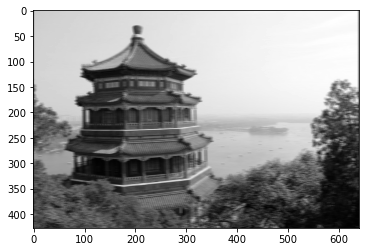

In [193]:
plt.imshow(outputs[0,:,:,1], cmap = 'gray')
plt.show()

In [301]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0,1,n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size,  n_steps) - 0.5)
#     for n in range(2):
#         plt.subplot(2, 1, n+1)
#         plt.plot(series[n,:])
    return series[..., np.newaxis].astype(np.float32)

array([[[-0.10503615],
        [-0.11287053],
        [-0.1292196 ],
        [-0.05748399],
        [ 0.14419034],
        [ 0.3460881 ],
        [ 0.5374985 ],
        [ 0.62718385],
        [ 0.6958164 ],
        [ 0.6262111 ],
        [ 0.52206415],
        [ 0.28604177],
        [ 0.14021936],
        [ 0.13680954],
        [ 0.05564089],
        [ 0.09041149],
        [ 0.10084089],
        [ 0.03976356],
        [-0.01322073],
        [-0.25608554],
        [-0.40085974],
        [-0.6233996 ],
        [-0.6814787 ],
        [-0.65489626],
        [-0.5841453 ],
        [-0.3988385 ],
        [-0.22870971],
        [-0.11023863],
        [-0.02234686],
        [-0.00922127],
        [-0.0181163 ],
        [-0.07274329],
        [ 0.03057651],
        [ 0.19176246],
        [ 0.34373823],
        [ 0.54285216],
        [ 0.61087614],
        [ 0.717021  ],
        [ 0.6607955 ],
        [ 0.49839407],
        [ 0.36441195],
        [ 0.11935721],
        [ 0.02424043],
        [ 0

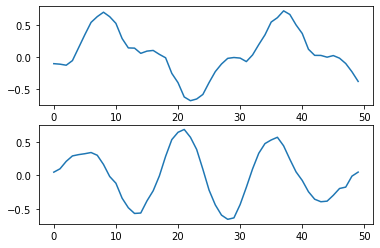

In [272]:
generate_time_series(2, 50)

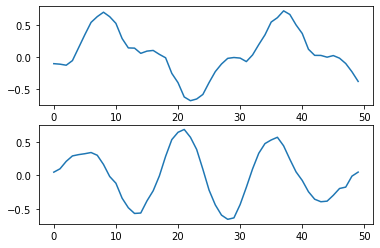

In [280]:
batch_size = 2

for n in range(batch_size):
    plt.subplot(batch_size,1,n+1)
    plt.plot(A[n,:,:])

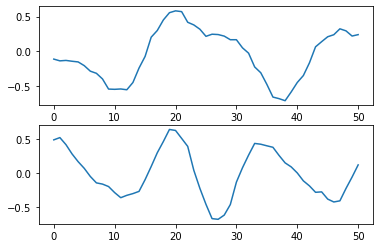

In [282]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [283]:
y_pred = X_valid[:,-1]

In [285]:
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.022281336

In [287]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

In [293]:
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.0901 - accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0657 - accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0468 - accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0159 - accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0126 - accuracy: 0.0000e+00
Epoch 9/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 10/20
219/219 [==============================] - 1s 5ms/st

In [295]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None,1])
])

In [296]:
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.0716 - accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0504 - accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 9/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 10/20
219/219 [==============================] - 1s 5ms/st

In [297]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape=[None,1]),
    keras.layers.SimpleRNN(1)
])

In [298]:
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
219/219 [==============================] - 6s 17ms/step - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 9/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 10/20
219/219 [==============================] - 

In [299]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
219/219 [==============================] - 4s 11ms/step - loss: 0.0291 - accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 10/20
219/219 [==============================] - 

In [302]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:,:n_steps], series[:,n_steps:]
X = X_new

for step_ahead in range(10):
    y_pred_one = model.predict(X[:,step_ahead])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis = 1)
    
y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 17ms/step


In [309]:
y_pred.shape

(1, 10, 1)

In [310]:
X

array([[[ 0.74447376],
        [ 0.64538944],
        [ 0.46132076],
        [ 0.28849515],
        [ 0.06896048],
        [-0.1474541 ],
        [-0.30637312],
        [-0.37591898],
        [-0.37810704],
        [-0.34524325],
        [-0.36644018],
        [-0.27889064],
        [-0.23210716],
        [-0.27234492],
        [-0.26959407],
        [-0.19552934],
        [-0.09874163],
        [ 0.08532676],
        [ 0.27528515],
        [ 0.49010012],
        [ 0.66268814],
        [ 0.68692994],
        [ 0.64332765],
        [ 0.4584627 ],
        [ 0.18994422],
        [-0.09281798],
        [-0.37227616],
        [-0.54066604],
        [-0.56072336],
        [-0.56355816],
        [-0.5080152 ],
        [-0.36248484],
        [-0.15929268],
        [-0.07756156],
        [ 0.07413254],
        [ 0.08547596],
        [ 0.09059715],
        [ 0.16757055],
        [ 0.27947193],
        [ 0.2786257 ],
        [ 0.36972746],
        [ 0.4645166 ],
        [ 0.46705657],
        [ 0

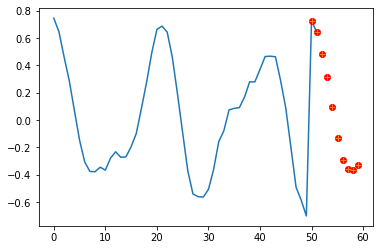

In [352]:
plt.figure()

plt.plot(X[0,:50+2,0])

xlim = plt.xlim()

start = xlim[1]

x2 = np.arange(10)

x2 = [x + start for x in x2 - 3.5]

plt.plot(x2, y_pred[0,:,0], 'ro')

plt.plot(x2, X[0,50:,0], '+')

In [311]:
y_pred

array([[[ 0.7253169 ],
        [ 0.64445055],
        [ 0.48182952],
        [ 0.31604952],
        [ 0.09275815],
        [-0.13169728],
        [-0.2926582 ],
        [-0.3608709 ],
        [-0.36298984],
        [-0.33098444]]], dtype=float32)

In [317]:
xlim[1]

61.95

In [333]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [361]:
series = generate_time_series(1, n_steps + 10)

X_new, y_new = series[:, :n_steps], series[:, n_steps:]

X = X_new

for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:,np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis = 1)
    
y_pred = X[:, n_steps:]

1/1 [==============================] - 0s 21ms/step


In [362]:
y_pred

array([[[0.2260338 ],
        [0.35907057],
        [0.49338067],
        [0.59774196],
        [0.6494917 ],
        [0.6143773 ],
        [0.5217616 ],
        [0.39321297],
        [0.25408438],
        [0.11735452]]], dtype=float32)

In [364]:
series = generate_time_series(10000, n_steps + 10)

X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [366]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [367]:
model.compile(loss = 'MSE', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.0601 - accuracy: 0.3887 - val_loss: 0.0264 - val_accuracy: 0.5220
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0205 - accuracy: 0.5296 - val_loss: 0.0183 - val_accuracy: 0.5680
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0165 - accuracy: 0.5729 - val_loss: 0.0137 - val_accuracy: 0.6055
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0141 - accuracy: 0.6053 - val_loss: 0.0145 - val_accuracy: 0.6070
Epoch 5/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0135 - accuracy: 0.6141 - val_loss: 0.0138 - val_accuracy: 0.6210
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0125 - accuracy: 0.6184 - val_loss: 0.0126 - val_accuracy: 0.6295
Epoch 7/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0116 - accuracy: 0.6320 - val_loss: 0.0108 - val_accuracy: 0.6480

# Natural Language Processing

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #This line is necessary on macbook s.t. models compile

2023-01-30 21:50:15.574808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [80]:
shakespeare_url = "https://homl.info/shakespeare"
filepath = keras.utils.get_file('shakespeare.txt', shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

In [88]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level = True)
tokenizer.fit_on_texts([shakespeare_text])

In [82]:
max_id = len(tokenizer.word_index)
dataset_size = tokenizer.document_count

In [89]:
print(dataset_size)

1


In [85]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [96]:
shape = encoded.shape[0]

In [97]:
train_size = shape * 90//100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [98]:
train_size

1003854

In [99]:
n_steps = 100
window_length = n_steps + 1
dataset = dataset.window(window_length, shift = 1, drop_remainder = True)

In [100]:
dataset = dataset.flat_map(lambda window: window.batch(window_length))

/Users/quinlanmcmahon/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [101]:
print(shakespeare_text[:148])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?



In [102]:
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [103]:
# Reminder that categorical features should be one-hot encoded
# This is what we do to our flat mapped dataset
dataset = dataset.map(lambda X_batch, Y_batch : (tf.one_hot(X_batch, depth = max_id), Y_batch))

# Finally add prefetching
dataset = dataset.prefetch(1)

In [104]:
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences = True, input_shape = [None, max_id], dropout = 0.2, 
                     recurrent_dropout = 0.2),
    keras.layers.GRU(128, return_sequences = True, input_shape = [None, max_id], dropout = 0.2, 
                     recurrent_dropout = 0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id, activation = 'softmax'))
])

In [105]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam')

In [107]:
model.fit(dataset, epochs = 1)

    541/Unknown - 1201s 2s/step - loss: 2.2813

KeyboardInterrupt: 

In [ ]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

In [ ]:
X_new = preprocess(['How are yo'])
y_pred = model.predict_classes(X_new)
tokenizer.sequences_to_texts(y_pred + 1)[0][-1]

In [ ]:
def next_char(text, temperature = 1):
    X_new = preprocess([text])
    y_proba = model.predict(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples = 1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [ ]:
def complete_text(text, n_chars = 50, temperature = 1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text